<a href="https://colab.research.google.com/github/EddieOrmseth/MAT-421/blob/main/Module%20H/ModuleH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ODE Initial Value Problem Statement: An ordinary differential equation is an equation with only normal (as in not partial) derivatives. The initial value statement part means that after the integration step, the problem will be solved using whatever initial conditions are given.

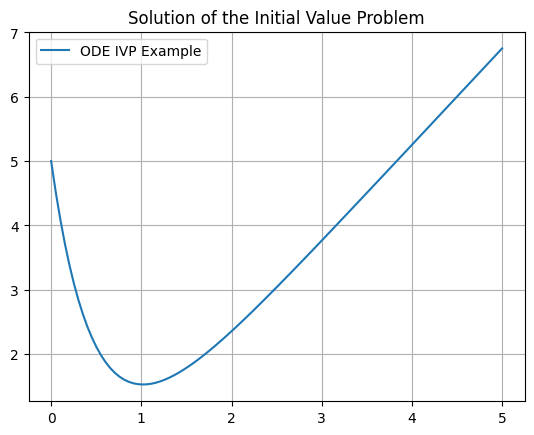

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


# this is the initial function I will use
def ode_function(t, y):
    return -2*y + 3*t


# the initail value is 0, only 1 element since there is only 1 dimension
y0 = [5]

t_span = (0, 5) # evaluate the function on this interval
t_eval = np.linspace(0, 5, 100) # this is the space, with a total of 100 values

# use scipy to solve the initial value problem
solution = solve_ivp(ode_function, t_span, y0, t_eval=t_eval, method='RK45')

plt.plot(solution.t, solution.y[0], label="ODE IVP Example") # plot the solution
plt.title("Solution to the IVP")
plt.legend()
plt.grid()
plt.show()


Reduction of Order: If one solution of the problem is already known, then it becomes easier to find the second as long as it has a certain form.

Suppose y1(t) is a solution to the function, then we can say that the second solution y2(t) has the form v(t) * y1(t) for some function v(t).

Knowing this information makes solving for the second solution y2(t) much easier.

Second solution: y2(x) = x**2


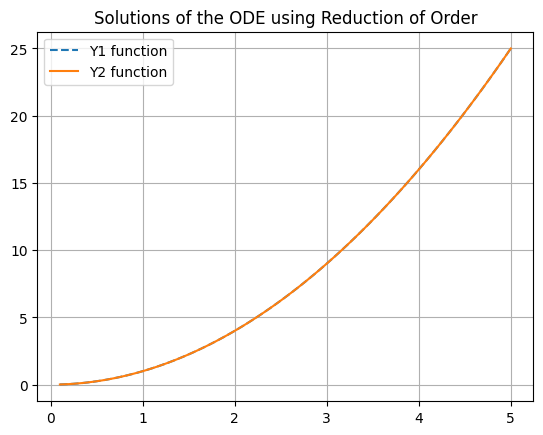

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt


x = sp.symbols('x') # create main variable
v = sp.Function('v')(x)
C1, C2 = sp.symbols('C1 C2') # create constants for later

# y1 and y2 solutions
y1 = x**2
y2 = v * y1

# compute derivatives
y2_diff1 = sp.diff(y2, x)
y2_diff2 = sp.diff(y2_diff1, x)

# main ode to be solved
ode = x**2 * y2_diff2 - 4*x * y2_diff1 + 6*y2
ode_simplified = sp.simplify(ode)

# final solutions
v_eqn = sp.simplify(ode_simplified / y1)
v_general = sp.dsolve(sp.simplify(v_eqn), v).rhs
y2_final = sp.simplify(v_general * y1)
y2_final = y2_final.subs({C1: 1, C2: 0})

# create the final solution stuff
print(f"Second solution: y2(x) = {y2_final}")
y2_func = sp.lambdify(x, y2_final, 'numpy')

# values to be displayed in the plot
x_vals = np.linspace(0, 5, 100) # x values
y1_vals = x_vals**2
y2_vals = y2_func(x_vals)

# plot the rest of the data
plt.plot(x_vals, y1_vals, label="Y1 function", linestyle="dashed")
plt.plot(x_vals, y2_vals, label="Y2 function", linestyle="solid") # this line fails
plt.title("Both Solutions")
plt.legend()
plt.grid()
plt.show()


Euler's Method: this is a numerical method that approximates the value of a function given its differential equation. Using the slope of the equation, given by the ODE, along with a step size, Euler's method can estimate the next value of a function.

y_n+1 = y_n + f(x) * h

where h is the step size, f(x) is the ODE, y_n is the current estimate, and y_n+1 is the next value in the iteration.

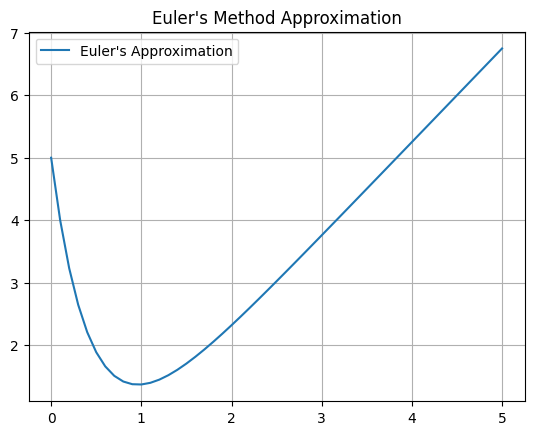

In [6]:
import numpy as np
import matplotlib.pyplot as plt


def f(x, y): # this is the same ODE as before
    return -2 * y + 3 * x


def eulers_method(f, x0, y0, h, x_end): # method to evaluate funtion used euler's method
    x_values = np.arange(x0, x_end + h, h) # make all the x values
    y_values = np.zeros(len(x_values)) # start with zeros
    y_values[0] = y0 # initial value

    for i in range(1, len(x_values)): # iteratively compute the next y value
        y_values[i] = y_values[i - 1] + h * f(x_values[i - 1], y_values[i - 1])

    return x_values, y_values


# initial value stuff
x0 = 0
y0 = 5
h = 0.1
x_end = 5
x_vals, y_vals = eulers_method(f, x0, y0, h, x_end) # grab x and y values

# plot the rest of the data
plt.plot(x_vals, y_vals, label="Euler's Approximation") # Plot the solution
plt.title("Euler's Method Example")
plt.legend()
plt.grid()
plt.show()
